# Import libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scripts.utility import load_dataset, calculate_pearson, calculate_spearman
from scripts.plot import plot_numeric_histograms, plot_time_series, plot_correlation_heatmap,plot_scatter_plots, plot_wind_analysis, plot_bubble_chart

# Read the Dataset

In [2]:
df = load_dataset('benin-malanville.csv')
df


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1      0.0  998         0            0.0   26.3   
1          0.0      0.0    0.0      0.0  998         0            0.0   26.3   
2          1.1      0.5  124.6      1.5  997         0            0.0   26.4   
3          0.7      0.4  120.3      1.3  997         0            0.0   26.4   
4          0.7      0.3  113.2      1.0  997         0            0.0   26.4   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     1.1      0.5  119.3      4.1  996         0            0.0   23.5   
525596     0.7      0.4  115.2      2.3  996         0            0.0   23.5   
525597     1.1      0.5  129.8      3.4  996         0            0.0   23.5   
525598     1.3      0.5  124.4      4.3  996         0            0.0   23.5   
525599     1.6      0.3  124.1      5.9  996         0            0.0   23.5   

        TModB  Comments  
0        26.2       NaN  
1        26.2       NaN  
2        26.2       NaN  
3        26.3       NaN  
4        26.3       NaN  
...       ...       ...  
525595   22.9       NaN  
525596   22.9       NaN  
525597   22.9       NaN  
525598   22.9       NaN  
525599   22.9       NaN  

[525600 rows x 19 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### How many rows have values of zero overall 

In [4]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    total = len(df[col])
    zeros = (df[col] == 0).sum()
    percent_zeros = (zeros / total) * 100
    print(f"{col}: {percent_zeros:.2f}% zeros")

GHI: 0.07% zeros
DNI: 1.12% zeros
DHI: 0.07% zeros
ModA: 46.72% zeros
ModB: 46.80% zeros
WS: 12.97% zeros
WSgust: 12.19% zeros


# Pre-processing step

In [5]:
# List of columns to clean as they consist of negative values
columns_to_clean = ['GHI', 'DNI', 'DHI']

# Replace negative values with 0 in the specified columns
df[columns_to_clean] = df[columns_to_clean].clip(lower=0)

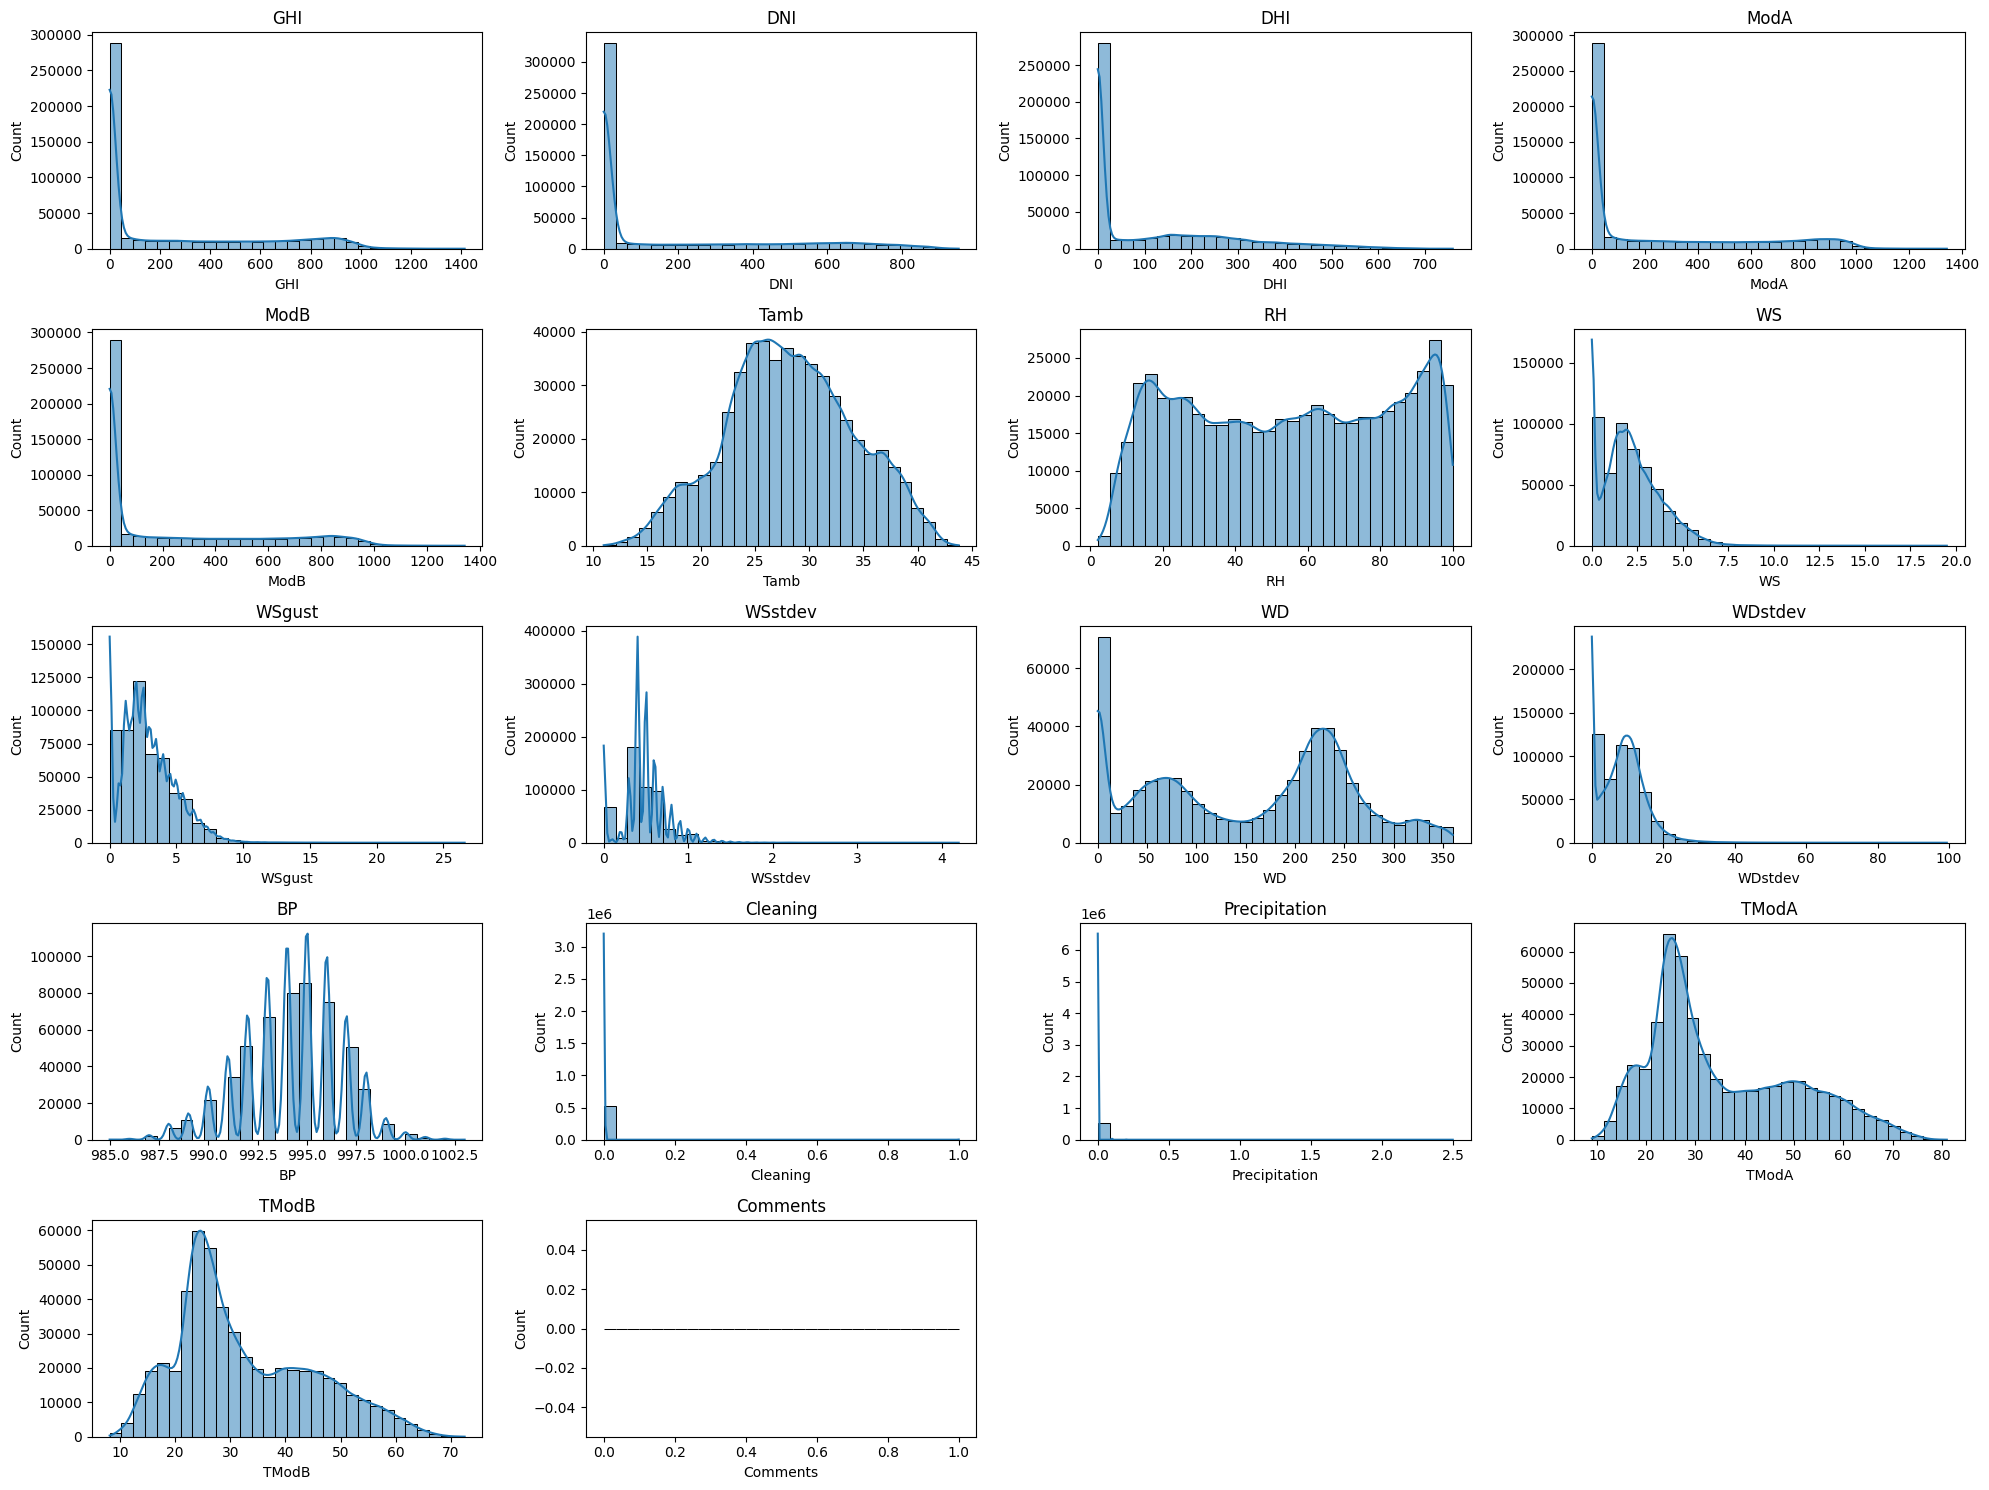

In [6]:
plot_numeric_histograms(df)

# Summary Statistics & Missing Values

In [7]:
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     241.958821     167.441866   
min              2021-08-09 00:01:00       0.000000       0.000000   
25%              2021-11-08 06:00:45       0.000000       0.000000   
50%              2022-02-07 12:00:30       1.800000       0.000000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     330.101787     261.547532   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.993033     236.589496     228.883576      28.179683   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.600000       4.500000       4.300000      28.000000   
75%       216.300000     463.700000     447.900000      32.300000   
max       759.200000    1342.300000    1342.300000      43.800000   
std       157.463619     326.894859     316.536515       5.924297   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       54.487969       2.121113       2.809195       0.473390   
min         2.100000       0.000000       0.000000       0.000000   
25%        28.800000       1.000000       1.300000       0.400000   
50%        55.100000       1.900000       2.600000       0.500000   
75%        80.100000       3.100000       4.100000       0.600000   
max       100.000000      19.500000      26.600000       4.200000   
std        28.073069       1.603466       2.029120       0.273395   

                  WD        WDstdev             BP       Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      153.435172       8.582407     994.197199       0.000923   
min         0.000000       0.000000     985.000000       0.000000   
25%        59.000000       3.700000     993.000000       0.000000   
50%       181.000000       8.600000     994.000000       0.000000   
75%       235.100000      12.300000     996.000000       0.000000   
max       360.000000      99.400000    1003.000000       1.000000   
std       102.332842       6.385864       2.474993       0.030363   

       Precipitation          TModA          TModB  Comments  
count  525600.000000  525600.000000  525600.000000       0.0  
mean        0.001905      35.246026      32.471736       NaN  
min         0.000000       9.000000       8.100000       NaN  
25%         0.000000      24.200000      23.600000       NaN  
50%         0.000000      30.000000      28.900000       NaN  
75%         0.000000      46.900000      41.500000       NaN  
max         2.500000      81.000000      72.500000       NaN  
std         0.037115      14.807258      12.348743       NaN

In [8]:
df['RH'].describe()

count    525600.000000
mean         54.487969
std          28.073069
min           2.100000
25%          28.800000
50%          55.100000
75%          80.100000
max         100.000000
Name: RH, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [10]:
df.shape

(525600, 19)

In [11]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [12]:
df['Cleaning'].unique()

array([0, 1])

In [13]:
(df.isna().mean() * 100).sort_values(ascending=False)  # Percent nulls

Comments         100.0
WSstdev            0.0
TModB              0.0
TModA              0.0
Precipitation      0.0
Cleaning           0.0
BP                 0.0
WDstdev            0.0
WD                 0.0
Timestamp          0.0
GHI                0.0
WS                 0.0
RH                 0.0
Tamb               0.0
ModB               0.0
ModA               0.0
DHI                0.0
DNI                0.0
WSgust             0.0
dtype: float64

### Drop the `Comments` column

In [14]:
df.drop(columns=['Comments'], inplace=True)

### Outliers Detection

In [15]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)

outliers = (z_scores.abs() > 3).sum()
outliers

GHI         90
DNI          2
DHI       3889
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

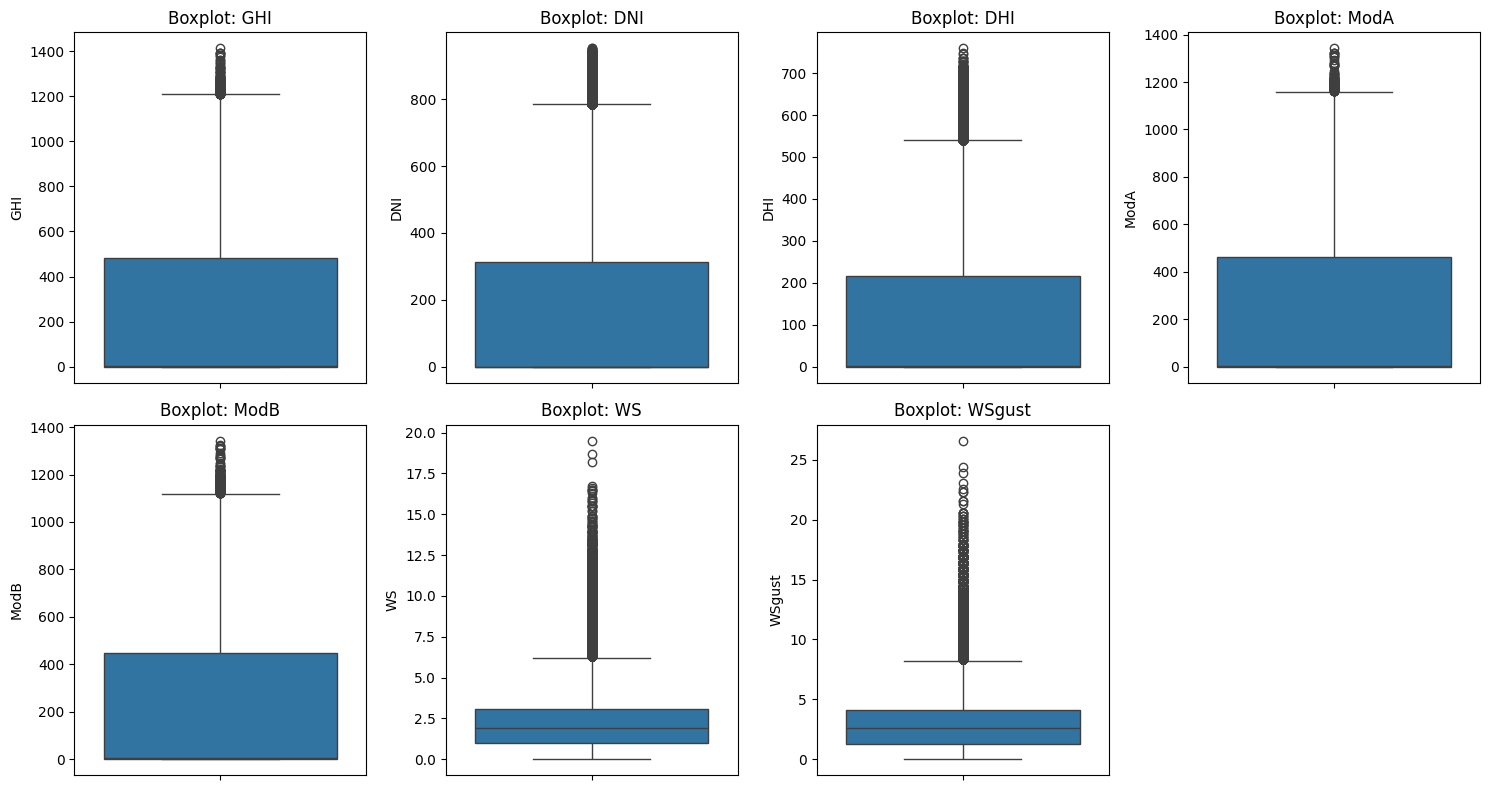

In [18]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

### Basic Cleaning

In [19]:
# Drop or fill missing values in key columns
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].fillna(df_clean[cols_to_check].median())

In [21]:
df_clean.to_csv('benin_clean.csv', index=False)

### Time Series Analysis

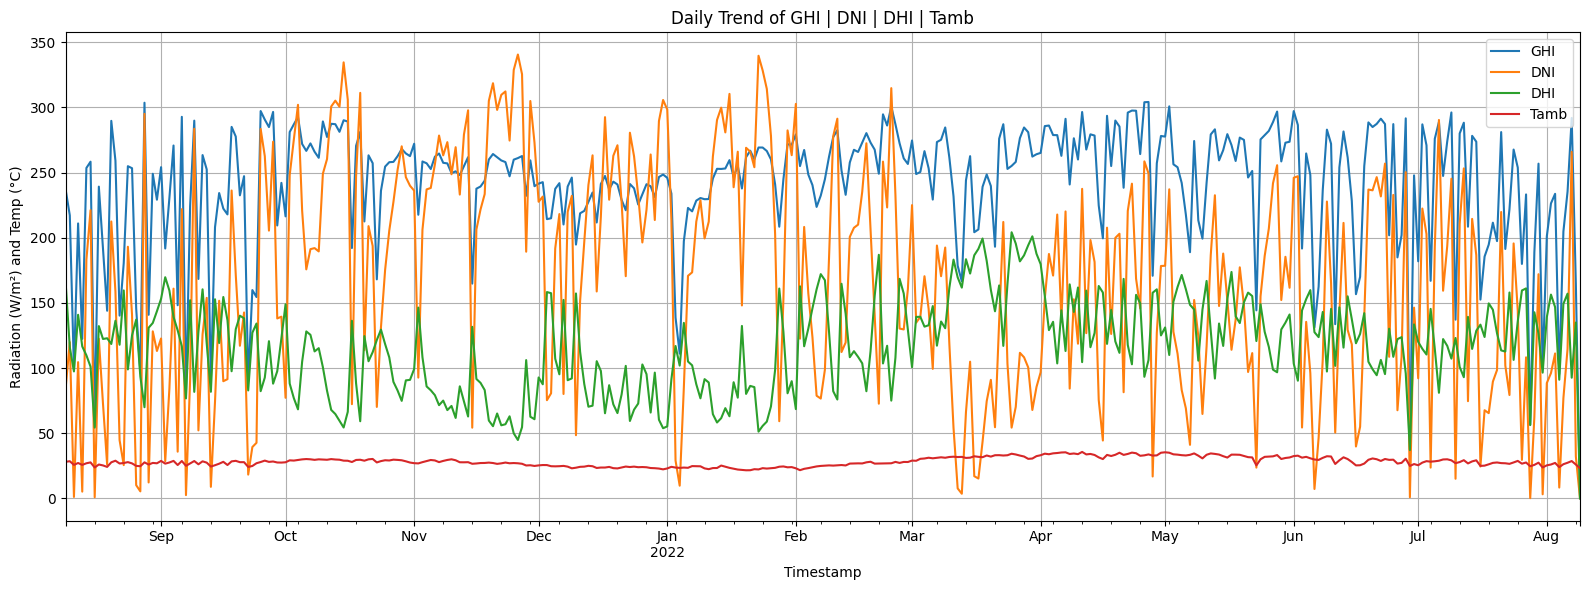

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[cols].resample(freq).mean()


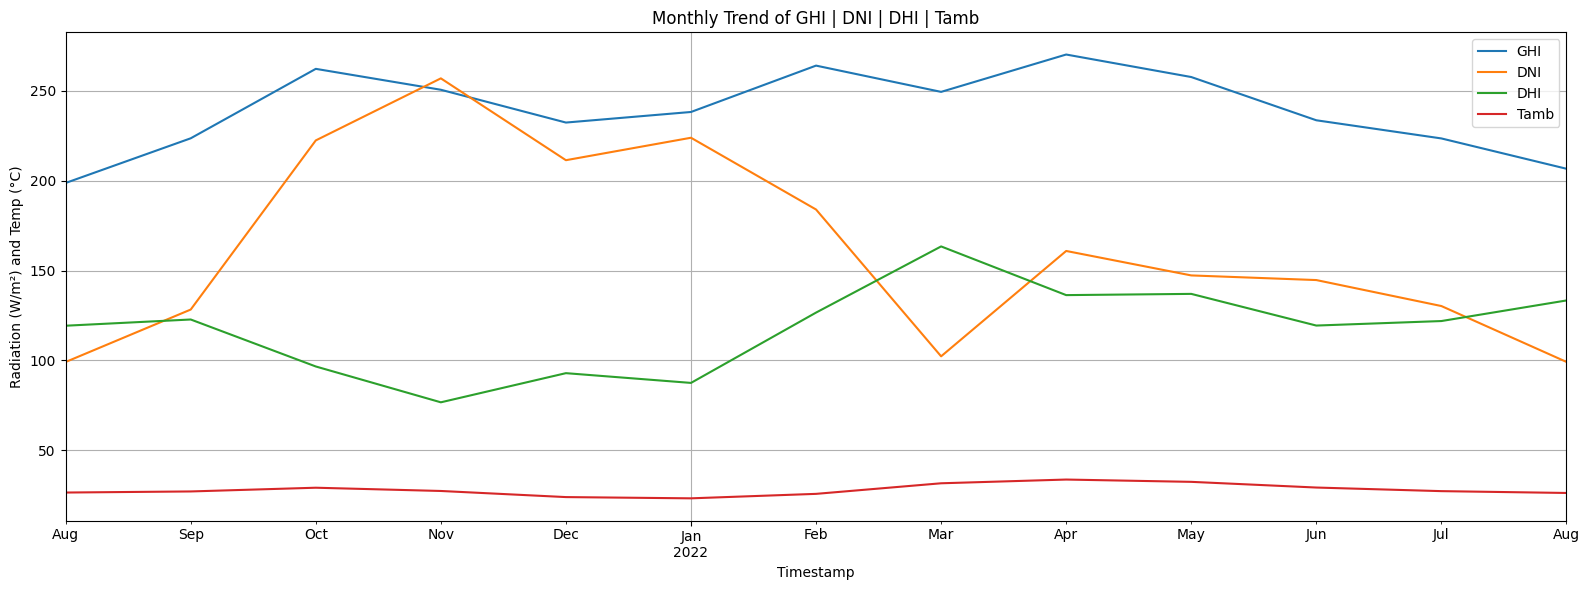

In [22]:

plot_time_series(
    df=df_clean,
    cols=['GHI', 'DNI', 'DHI', 'Tamb'],
    timestamp_col='Timestamp',
    y_label='Radiation (W/m²) and Temp (°C)',
    freq_title_map={
        'D': 'Daily',
        'M': 'Monthly'
    },
    freqs=['D', 'M'],
    figsize=(16, 6)
)

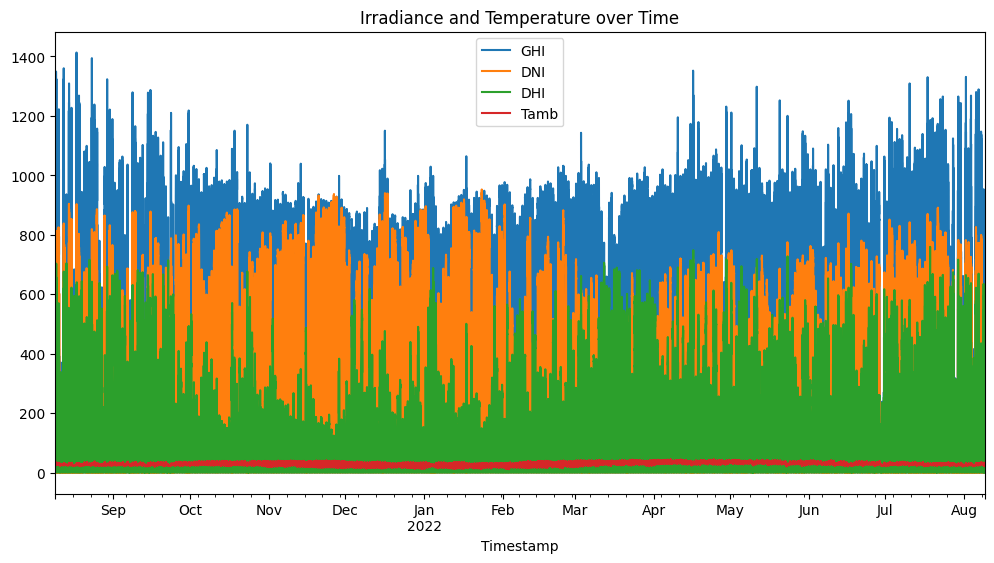

In [23]:
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Irradiance and Temperature over Time')
plt.show()

### Cleaning Impact Analysis

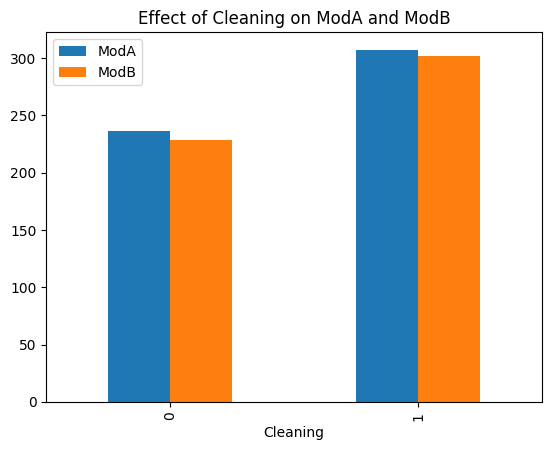

In [24]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on ModA and ModB')
plt.show()

### Correlation & Relationship Analysis

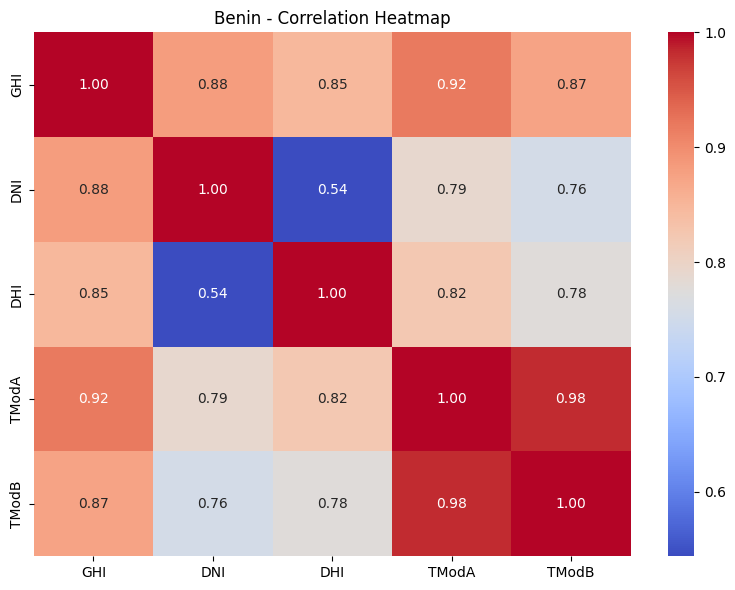

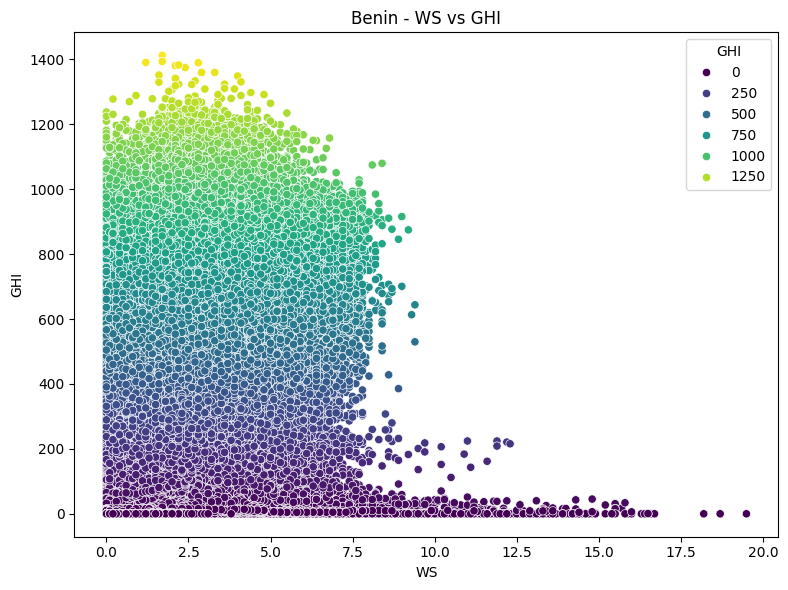

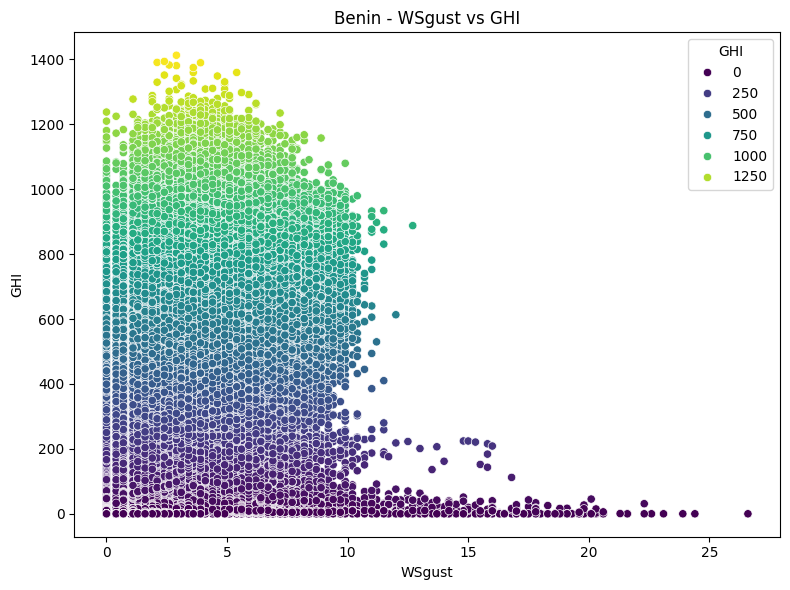

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


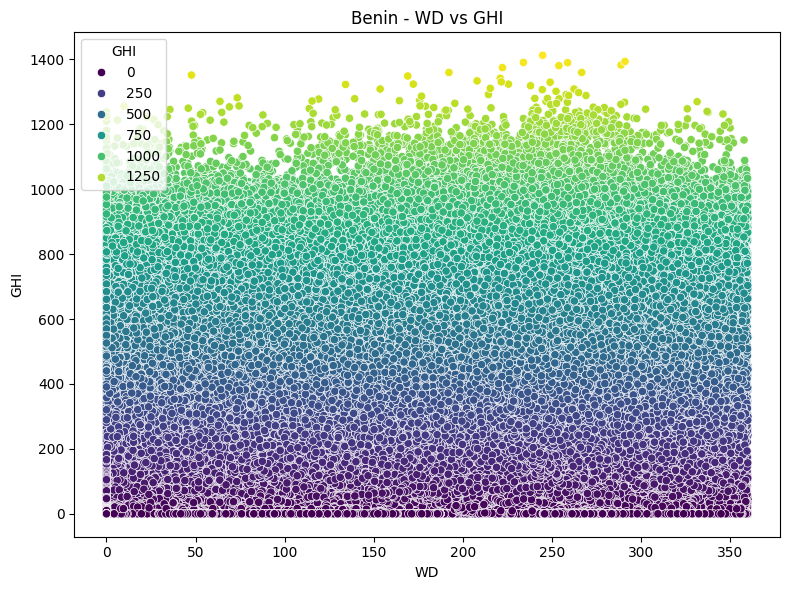

In [25]:
# Define parameters
heatmap_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
scatter_x_vars = ['WS', 'WSgust', 'WD']

# For Benin
plot_correlation_heatmap(df_clean, heatmap_columns, region_name='Benin')
plot_scatter_plots(df_clean, scatter_x_vars, region_name='Benin')

### Wind & Distribution Analysis

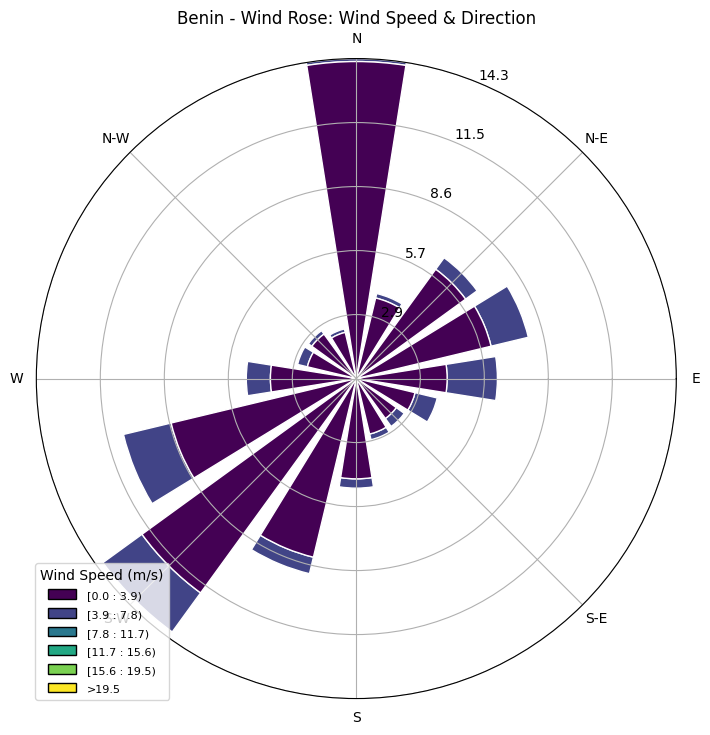

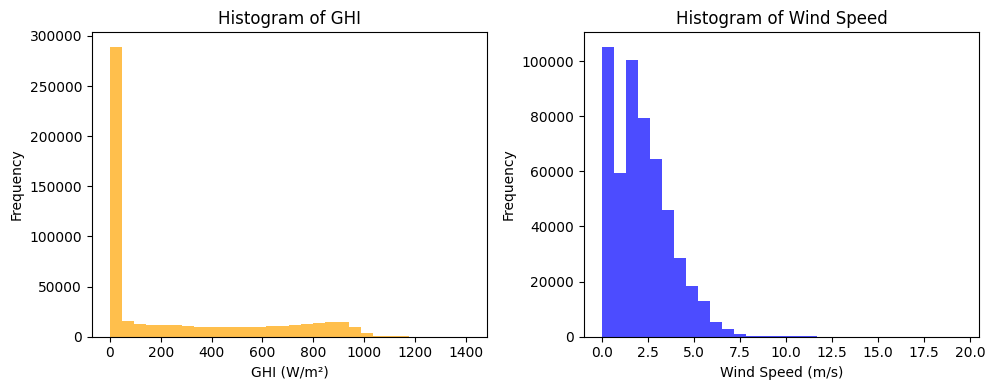

In [27]:
plot_wind_analysis(df_clean, region_name="Benin")

### Temperature & RH Relationship

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


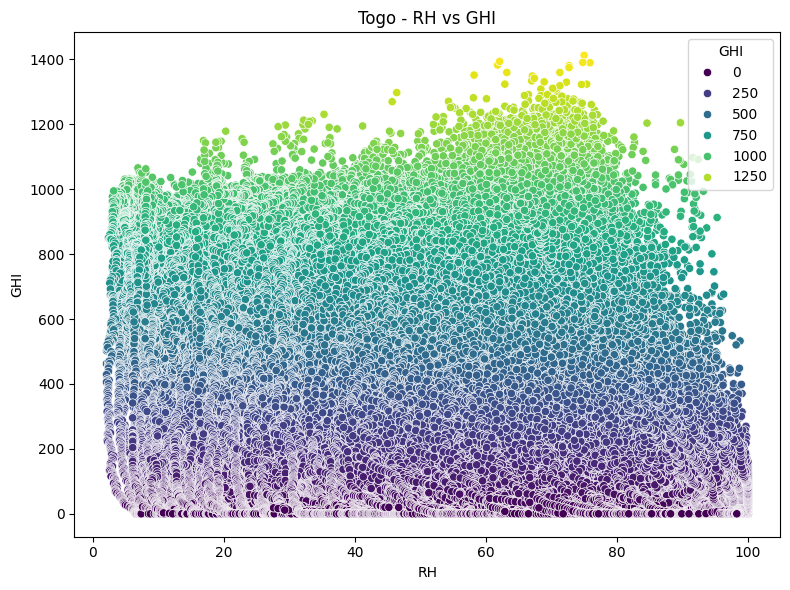

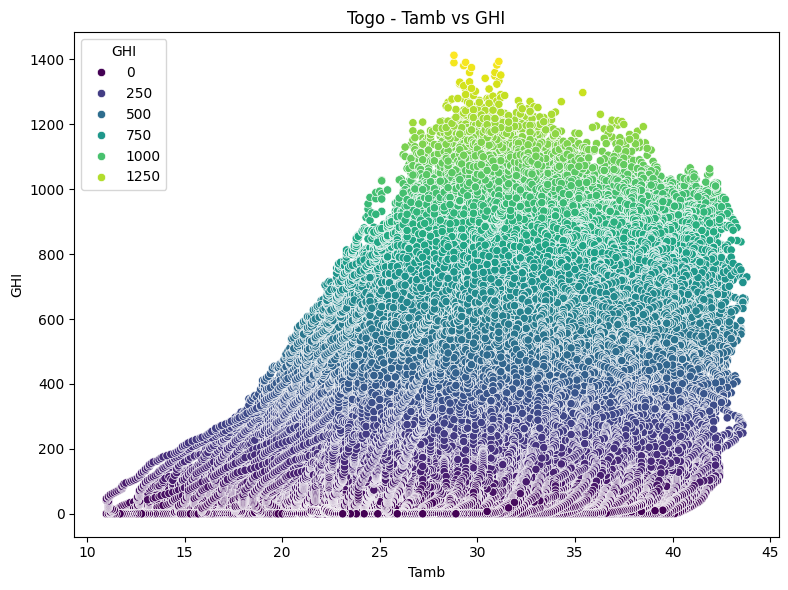

Pearson correlation between Tamb and RH: -0.415 (p=0.000e+00)
Spearman correlation between GHI and RH: -0.351 (p=0.000e+00)


In [28]:
plot_scatter_plots(df, x_columns=['RH', 'Tamb'], y_column='GHI', region_name='Togo')

# Calculate Pearson correlation
pearson_temp_rh = calculate_pearson(df, 'Tamb', 'RH')

# Calculate Spearman correlation
spearman_ghi_rh = calculate_spearman(df, 'GHI', 'RH')

### Bubble Chart

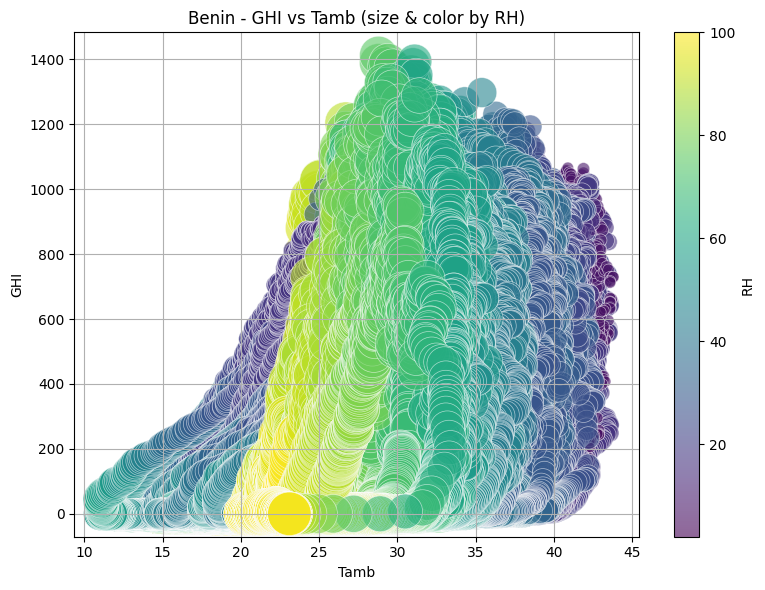

In [29]:
plot_bubble_chart(df, x_col='Tamb', y_col='GHI', size_col='RH', region_name='Benin')